In [47]:
from utils import plot_decision_boundary, poly_linear_regression, CM_BRIGHT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
%matplotlib inline 

## 1. Carga de datos

In [79]:
airbnb_data = pd.read_csv("./airbnb-listings-extract.csv", sep=";", decimal=".")
print(airbnb_data.shape)
airbnb_data.head(5).T

(14780, 89)


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


# 2. Análisis exploratorio

In [80]:
airbnb_data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [81]:
print(airbnb_data.dtypes)

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object


In [82]:
print(airbnb_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

+ Histograma de precios

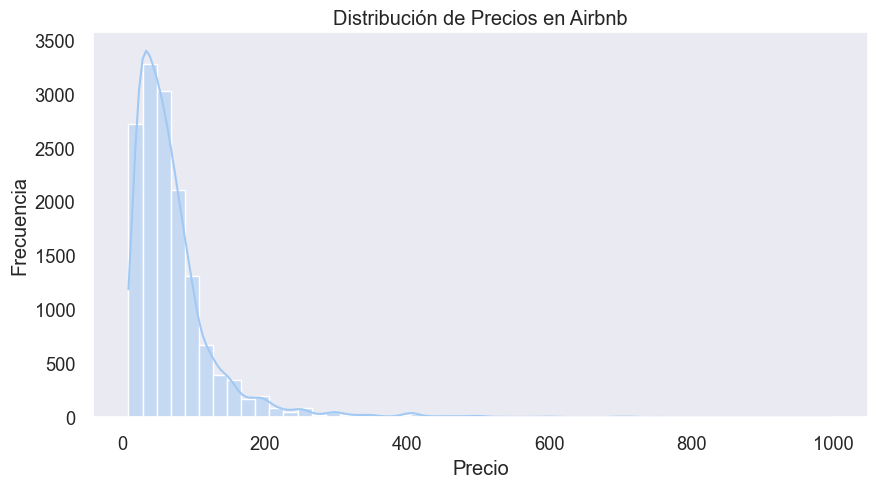

In [83]:
plt.figure(figsize=(10, 5))
sns.histplot(airbnb_data["Price"], bins=50, kde=True)
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios en Airbnb")
plt.show()

+ Boxplot para detectar outliers

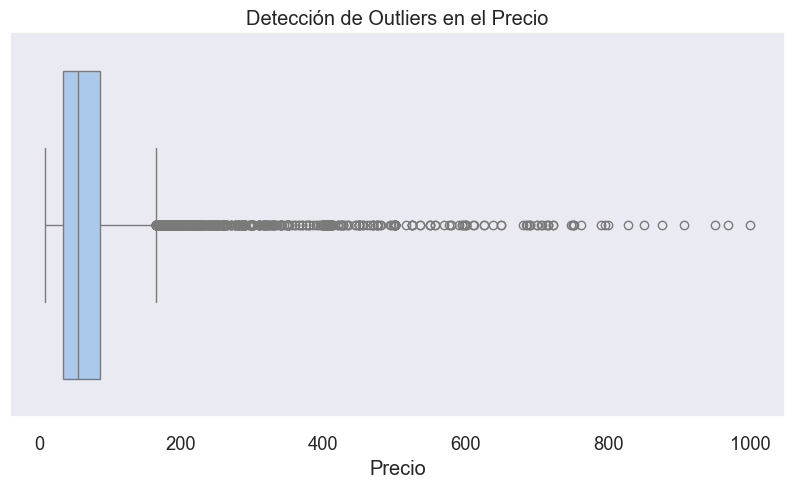

In [84]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=airbnb_data["Price"])
plt.xlabel("Precio")
plt.title("Detección de Outliers en el Precio")
plt.show()

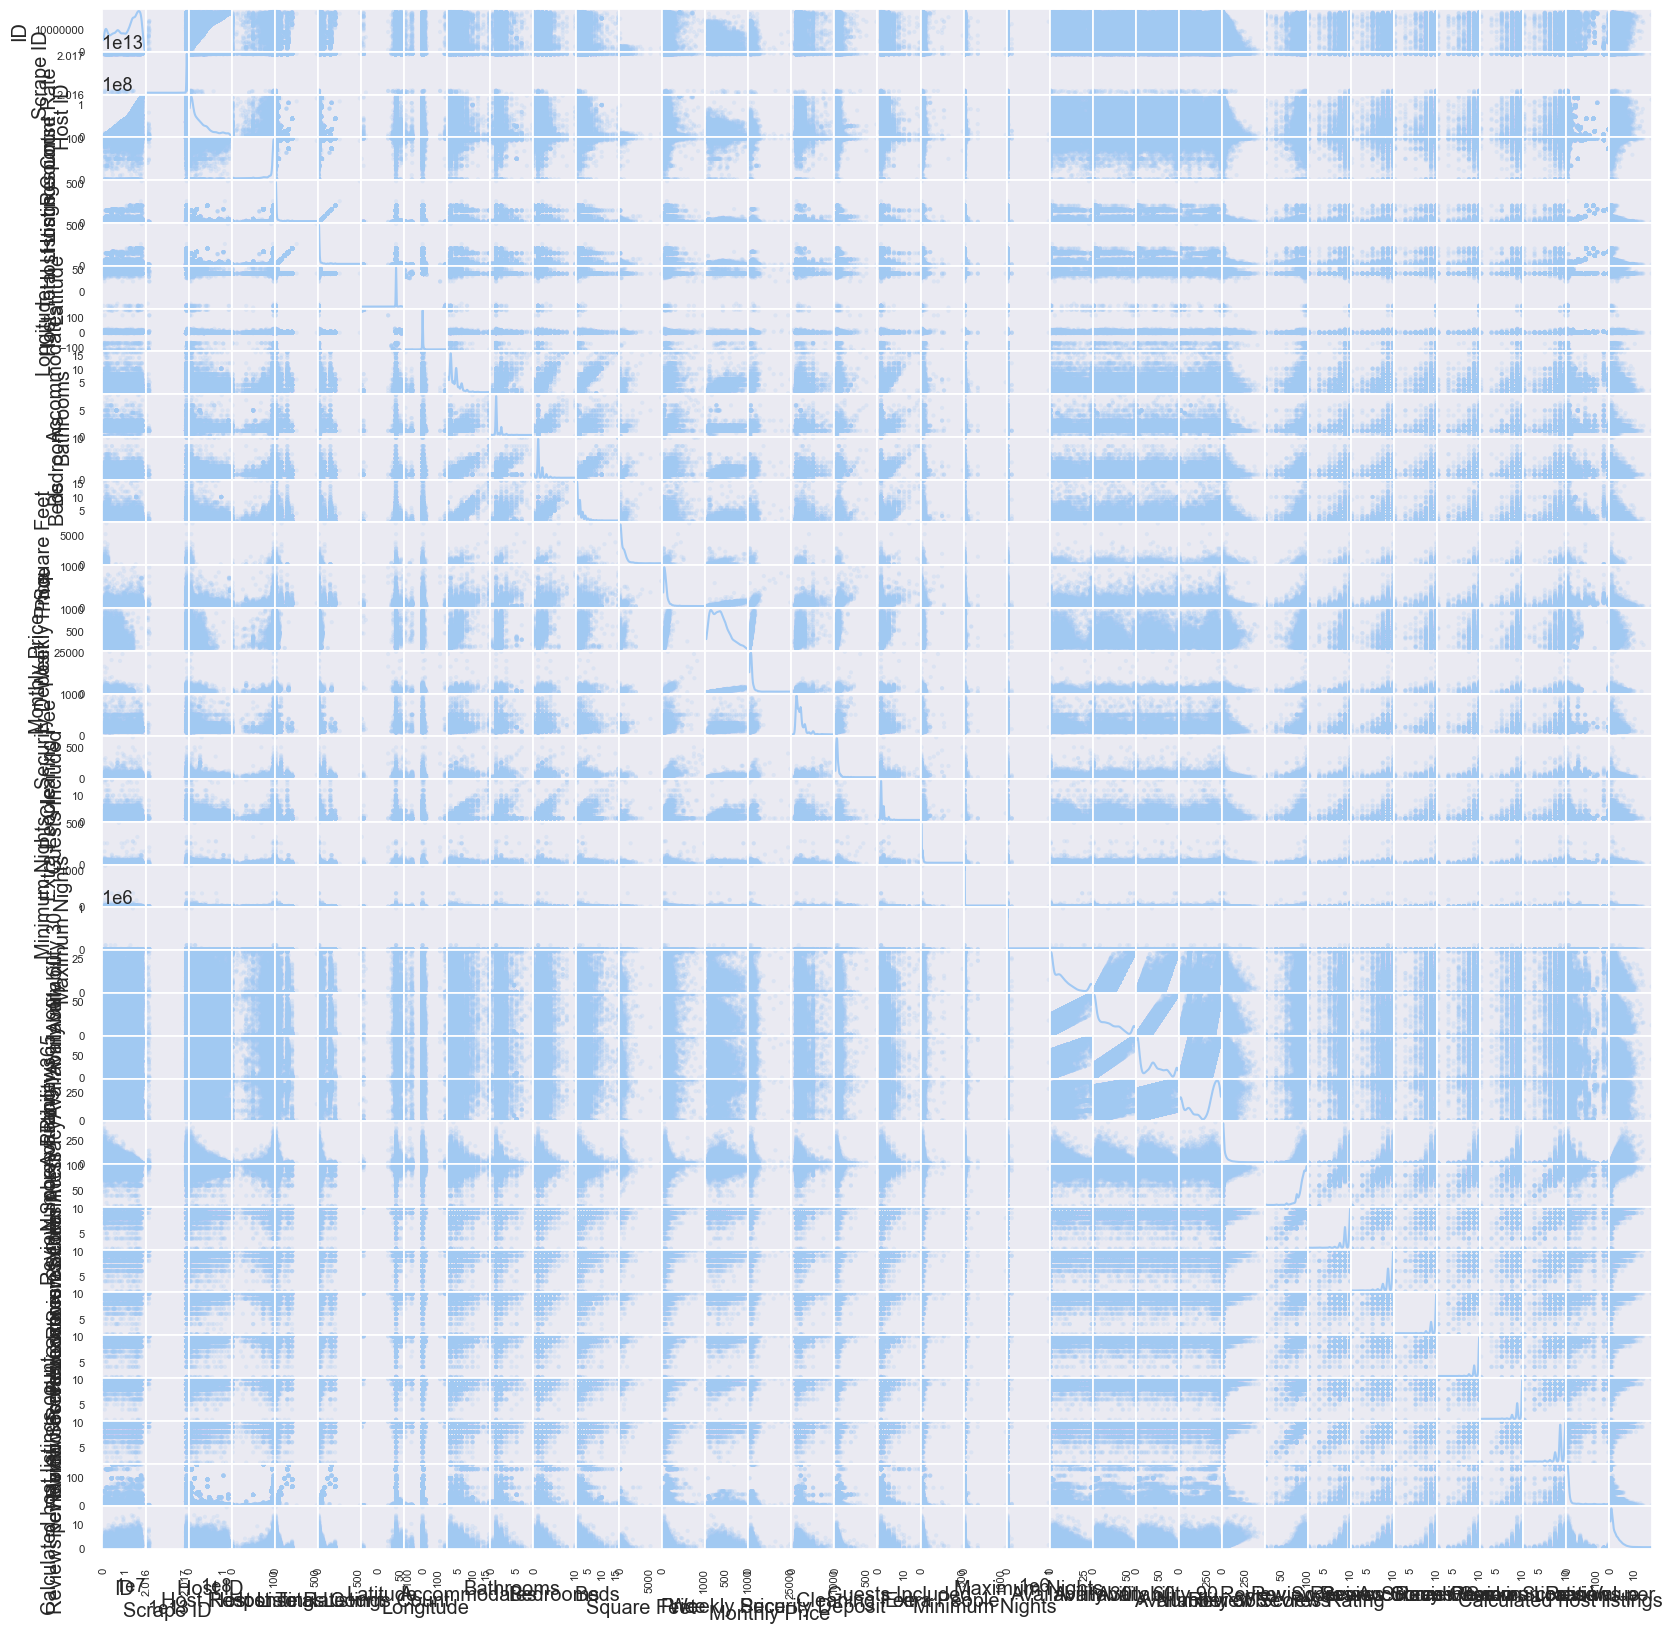

In [85]:
pd.plotting.scatter_matrix(airbnb_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

# 3. Preprocesamiento

+ Eliminamos manualmente variables irrevelantes

In [86]:
airbnb_data = airbnb_data.drop(
    columns=[
        "ID",
        "Scrape ID",
        "Listing Url",
        "Host ID",
        "Host URL",
        "Host Name",
        "Name",
        "Summary",
        "Description",
        "Space",
        "Neighborhood Overview",
        "Notes",
        "Transit",
        "Access",
        "Interaction",
        "House Rules",
        "Thumbnail Url",
        "Medium Url",
        "Picture Url",
        "XL Picture Url",
        "Host Thumbnail Url",
        "Host Picture Url",
        "Square Feet",
        "License",
        "Jurisdiction Names",
        "Host Acceptance Rate",
        "Neighbourhood",
        "Street",
        "Zipcode",
        "Market",
        "Smart Location",
        "Country Code",
        "Country",
        "Geolocation",
        "Features",
        "Host About",
        "Host Location",
        "Host Neighbourhood",
        "Host Verifications",
    ],
    errors="ignore",
)

+ Verficamos cuantos valores nulos existen

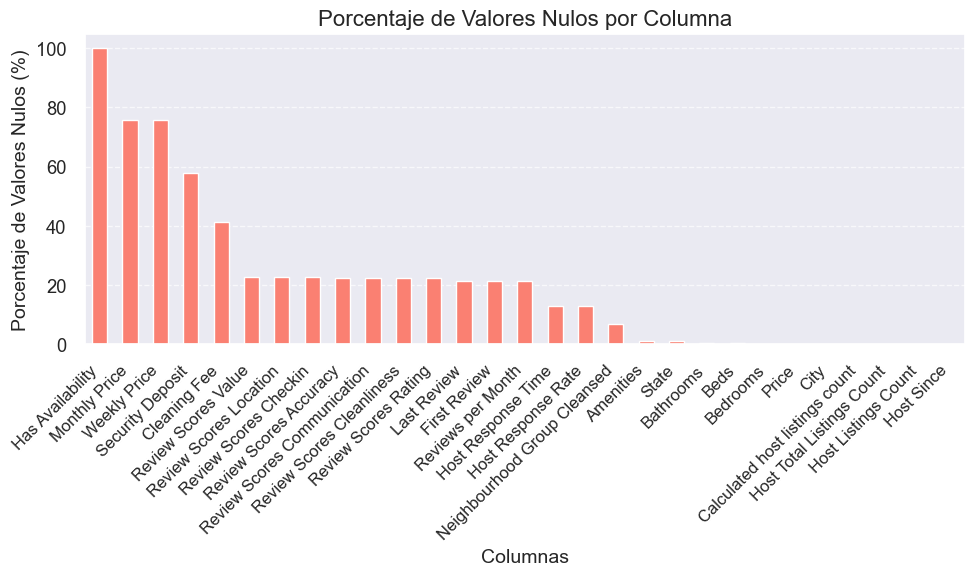

In [87]:
missing_values = airbnb_data.isnull().sum() / len(airbnb_data) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_values.plot(kind="bar", color="salmon")

plt.title("Porcentaje de Valores Nulos por Columna", fontsize=16)
plt.xlabel("Columnas", fontsize=14)
plt.ylabel("Porcentaje de Valores Nulos (%)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

+ Eliminamos las columnas que tengan más del 30% de valores nulos

In [88]:
umbral = 30
delete_columns = missing_values[missing_values > umbral].index
airbnb_data = airbnb_data.drop(columns=delete_columns)

print(f"Columnas eliminadas (más del {umbral}% de valores nulos):")
print(delete_columns)

Columnas eliminadas (más del 30% de valores nulos):
Index(['Has Availability', 'Monthly Price', 'Weekly Price', 'Security Deposit',
       'Cleaning Fee'],
      dtype='object')


+ Imputar valores nulos en columnas numéricas usando la mediana

In [89]:
num_cols = airbnb_data.select_dtypes(include=["number"]).columns

for col in num_cols:
    median_value = airbnb_data[col].median()
    airbnb_data[col].fillna(median_value, inplace=True)

+ Imputar valores categóricos con NA antes de codificarlos

In [90]:
cat_cols = airbnb_data.select_dtypes(include=["object"]).columns
for col in cat_cols:
    airbnb_data[col].fillna("NA", inplace=True)

+ Codificar variables categoricas

In [91]:
for col in cat_cols:
    le = LabelEncoder()
    airbnb_data[col] = le.fit_transform(airbnb_data[col].astype(str))

+ Eliminamos valores atipicos que vimos en el Boxplot para detectar outliers, a partir de 820 se dispara un poco los resultados.

In [92]:
airbnb_data = airbnb_data[airbnb_data['Price'] <= 820]

+ Generamos nuevas variables que nos pueden servir

In [ ]:
# # 1. Precio por Persona
# # Evitamos división por cero (se asume que 'Accommodates' es al menos 1)
# airbnb_data['Price_Per_Person'] = airbnb_data['Price'] / airbnb_data['Accommodates']
# # airbnb_data['Price_Per_Person']
# airbnb_data['Price_Per_Person'][airbnb_data['Price_Per_Person'] > 0]
# # 2. Relación Baños-Habitaciones
# # # Si 'Bedrooms' es 0, podemos asignar un valor predeterminado (por ejemplo, igual a 'Bathrooms' o 0)
# # airbnb_data['Bathrooms_to_Bedrooms_Ratio'] = np.where(airbnb_data['Bedrooms'] > 0, airbnb_data['Bathrooms'] / airbnb_data['Bedrooms'], 0)

+ Después de eliminar, imputar y codificar datos podemos ver la correlación con Precio y ver si podemos eliminar más datos

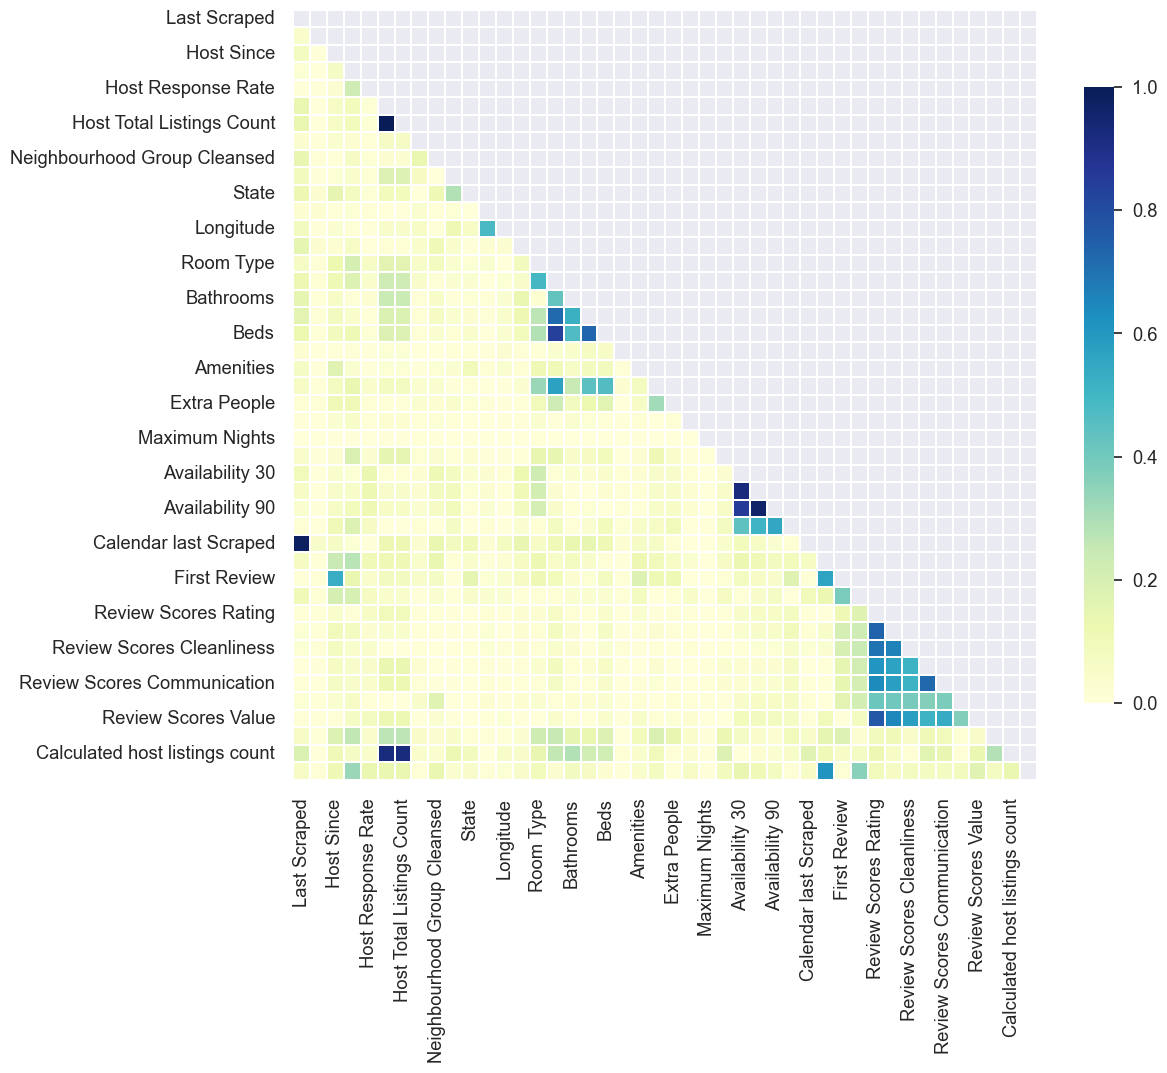

In [94]:
# Análisis de Correlación
# Para ver qué variables influyen más en el precio:

# Compute the correlation matrix
corr = np.abs(airbnb_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

+ Host Total Listings Count vs Host Listings Count

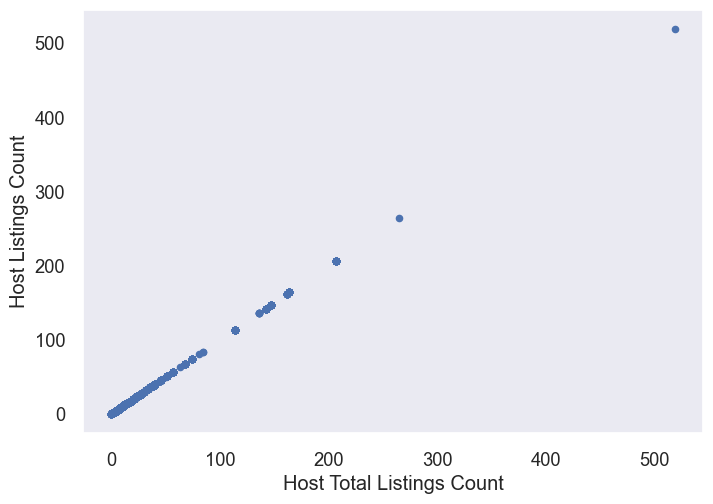

In [95]:
airbnb_data.plot(kind = 'scatter', x='Host Total Listings Count', y='Host Listings Count')
plt.xlabel('Host Total Listings Count')
plt.ylabel('Host Listings Count')
plt.show()

+ Eliminamos Host Listings Count ya que también tiene correlación con Calculated host listing count

In [96]:
airbnb_data = airbnb_data.drop(['Host Listings Count'], axis=1)

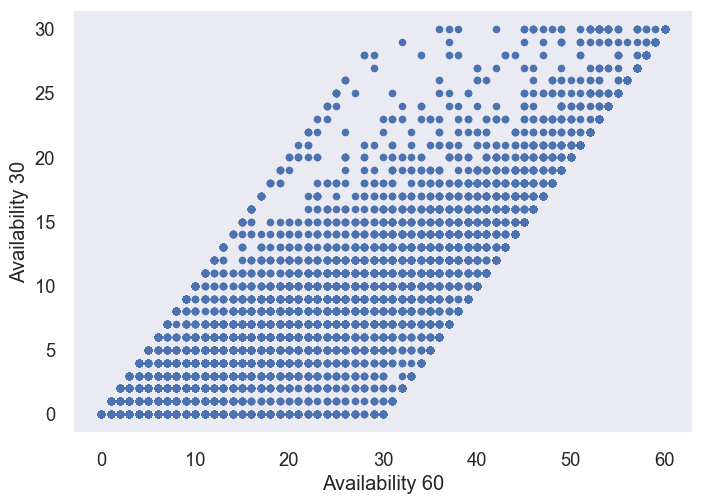

In [97]:
airbnb_data.plot(kind = 'scatter', x='Availability 60', y='Availability 30')
plt.xlabel('Availability 60')
plt.ylabel('Availability 30')
plt.show()

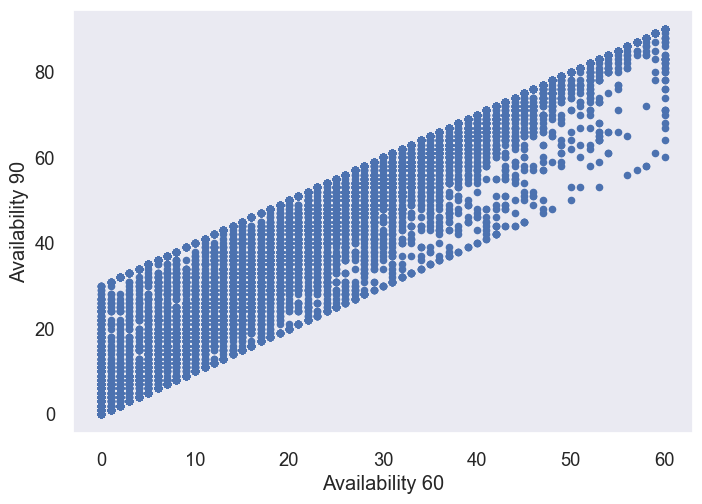

In [98]:
airbnb_data.plot(kind = 'scatter', x='Availability 60', y='Availability 90')
plt.xlabel('Availability 60')
plt.ylabel('Availability 90')
plt.show()

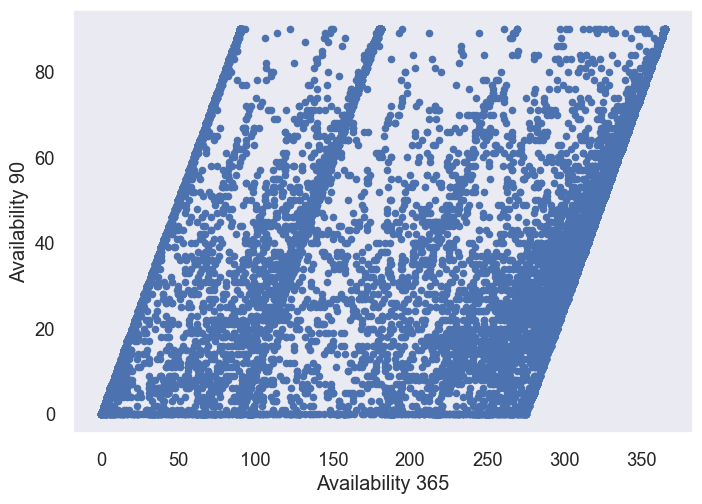

In [99]:
airbnb_data.plot(kind = 'scatter', x='Availability 365', y='Availability 90')
plt.xlabel('Availability 365')
plt.ylabel('Availability 90')
plt.show()

+ Con la disponibilidad podemos observar que hay mucha correlaciòn 30, 60, 90 y 365. Eliminamos todas y nos quedamos con 365 ya que contiene más información

In [100]:
airbnb_data = airbnb_data.drop(
    ["Availability 30", "Availability 60", "Availability 90"], axis=1
)

+ Separamos los datos en X(caracteristicas) e Y(objetivo)

In [101]:
X = airbnb_data.drop(columns=["Price"])
y = airbnb_data["Price"]

print("Filas, columnas", X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Filas, columnas (14773, 40)


+ Vemos como están distribuidos la variable precio en train y test

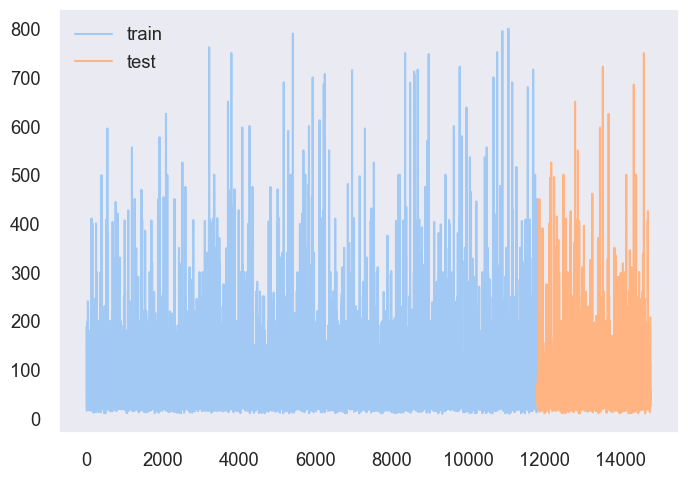

In [102]:
plt.plot(range(0, len(y_train)), y_train, label="train")
plt.plot(range(len(y_train), len(y)), y_test, label="test")
plt.legend()
plt.show()

+ Escalamos las caracteristicas antes de entrenarlo y hacer test

In [103]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

+ Usamos el algoritmo de regularizaciòn Lasso para ver si encontramos más variables incosistentes

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ...........................alpha=1.6681005372000592; total time=   0.0s
[CV] END ...........................alpha=1.6681005372000592; total time=   0.0s
[CV] END ...........................alpha=1.6681005372000592; total time=   0.0s
[CV] END ...........................alpha=27.825594022071257; total time=   0.0s
[CV] END ...........................alpha=27.825594022071257; total time=   0.0s
[CV] END ...........................alpha=27.825594022071257; total time=   0.0s
[CV] END ............................alpha=464.1588833612782; total time=   0.0s
[CV] END ............................alpha=464.1588833612782; total time=   0.0s
[CV] END ............................alpha=464.1

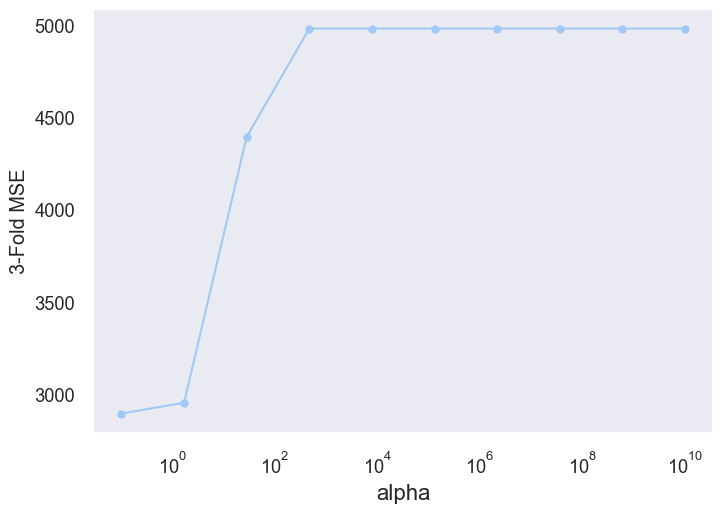

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,10)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [105]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_["alpha"]
lasso = Lasso(alpha=alpha_optimo).fit(X_train_scaled, y_train)

ytrainLasso = lasso.predict(X_train_scaled)
ytestLasso = lasso.predict(X_test_scaled)
mseTrainModelLasso = mean_squared_error(y_train, ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test, ytestLasso)

print("MSE Modelo Lasso (train): %0.3g" % mseTrainModelLasso)
print("MSE Modelo Lasso (test) : %0.3g" % mseTestModelLasso)

print("RMSE Modelo Lasso (train): %0.3g" % np.sqrt(mseTrainModelLasso))
print("RMSE Modelo Lasso (test) : %0.3g" % np.sqrt(mseTestModelLasso))

MSE Modelo Lasso (train): 2.83e+03
MSE Modelo Lasso (test) : 2.4e+03
RMSE Modelo Lasso (train): 53.2
RMSE Modelo Lasso (test) : 49


In [106]:
coef_series = pd.Series(lasso.coef_, index=X_train.columns)
print("Coeficientes Lasso:")
print(coef_series)

Coeficientes Lasso:
Last Scraped                      -0.000000
Experiences Offered               -1.734916
Host Since                         0.499181
Host Response Time                -3.927980
Host Response Rate                 0.895275
Host Total Listings Count         13.994882
Neighbourhood Cleansed             1.885654
Neighbourhood Group Cleansed       2.625219
City                               2.043726
State                             10.973904
Latitude                          -1.849012
Longitude                         -3.575086
Property Type                      2.131128
Room Type                        -14.951516
Accommodates                      18.363166
Bathrooms                         11.088974
Bedrooms                          13.055164
Beds                              -3.531089
Bed Type                          -0.000000
Amenities                         -5.919256
Guests Included                   -0.529243
Extra People                      -0.912298
Minimum Nigh

In [107]:
selected_features = coef_series[coef_series != 0].index
print("Variables retenidas por Lasso:\n", selected_features.tolist())

Variables retenidas por Lasso:
 ['Experiences Offered', 'Host Since', 'Host Response Time', 'Host Response Rate', 'Host Total Listings Count', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities', 'Guests Included', 'Extra People', 'Maximum Nights', 'Calendar Updated', 'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Cancellation Policy', 'Calculated host listings count', 'Reviews per Month']


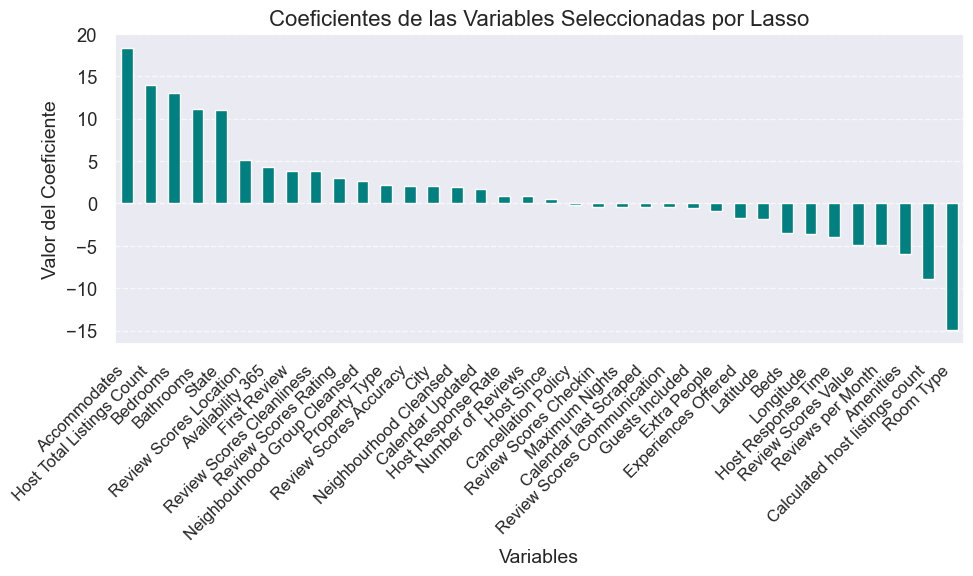

In [108]:
selected_features = coef_series[coef_series != 0]

plt.figure(figsize=(10, 6))
selected_features.sort_values(ascending=False).plot(kind="bar", color="teal")

plt.title("Coeficientes de las Variables Seleccionadas por Lasso", fontsize=16)
plt.ylabel("Valor del Coeficiente", fontsize=14)
plt.xlabel("Variables", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

In [109]:
columns_to_drop = coef_series[coef_series == 0].index
print("Columnas que se eliminarán:\n", columns_to_drop.tolist())

Columnas que se eliminarán:
 ['Last Scraped', 'Bed Type', 'Minimum Nights', 'Last Review']


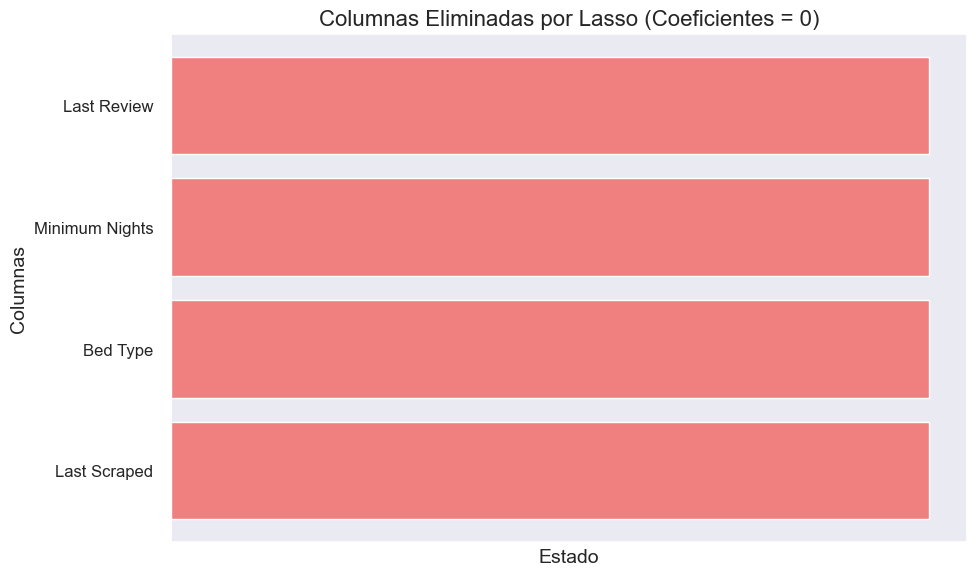

In [110]:
plt.figure(figsize=(10, 6))
plt.barh(columns_to_drop, [1] * len(columns_to_drop), color="lightcoral")

plt.title("Columnas Eliminadas por Lasso (Coeficientes = 0)", fontsize=16)
plt.xlabel("Estado", fontsize=14)
plt.ylabel("Columnas", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks([])  # Ocultar el eje X, ya que no es relevante aquí
plt.tight_layout()

plt.show()

In [111]:
X_train_lasso = X_train.drop(columns=columns_to_drop)
X_test_lasso = X_test.drop(columns=columns_to_drop)

print("Columnas originales:", X_train.shape[1])
print("Columnas tras eliminar:", X_train_lasso.shape[1])

Columnas originales: 40
Columnas tras eliminar: 36


In [112]:
X_train_lasso_scaled = scaler.fit_transform(X_train)
X_test_lasso_scaled = scaler.transform(X_test)

# 4. Modelado

+ Por simplicidad juntamos todo el analisis de datos y procesamiento en esta celda

In [48]:
airbnb_data = pd.read_csv("./airbnb-listings-extract.csv", sep=";", decimal=".")

# Eliminar columnas no deseadas
airbnb_data = airbnb_data.drop(
    columns=[
        "ID",
        "Scrape ID",
        "Listing Url",
        "Host ID",
        "Host URL",
        "Host Name",
        "Name",
        "Summary",
        "Description",
        "Space",
        "Neighborhood Overview",
        "Notes",
        "Transit",
        "Access",
        "Interaction",
        "House Rules",
        "Thumbnail Url",
        "Medium Url",
        "Picture Url",
        "XL Picture Url",
        "Host Thumbnail Url",
        "Host Picture Url",
        "Square Feet",
        "License",
        "Jurisdiction Names",
        "Host Acceptance Rate",
        "Neighbourhood",
        "Street",
        "Zipcode",
        "Market",
        "Smart Location",
        "Country Code",
        "Country",
        "Geolocation",
        "Features",
        "Host About",
        "Host Location",
        "Host Neighbourhood",
        "Host Verifications",
    ],
    errors="ignore",
)

# Eliminar columnas con más del 30% de valores nulos
missing_values = airbnb_data.isnull().sum() / len(airbnb_data) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
umbral = 30
delete_columns = missing_values[missing_values > umbral].index
airbnb_data = airbnb_data.drop(columns=delete_columns)

# Imputar valores nulos
num_cols = airbnb_data.select_dtypes(include=["number"]).columns
for col in num_cols:
    median_value = airbnb_data[col].median()
    airbnb_data[col].fillna(median_value, inplace=True)

# Codificar variables categóricas
cat_cols = airbnb_data.select_dtypes(include=["object"]).columns
for col in cat_cols:
    airbnb_data[col].fillna("NA", inplace=True)

for col in cat_cols:
    le = LabelEncoder()
    airbnb_data[col] = le.fit_transform(airbnb_data[col].astype(str))

# Eliminar outliers
airbnb_data = airbnb_data[airbnb_data['Price'] <= 820]
# Eliminar columnas no deseadas
airbnb_data = airbnb_data.drop(['Host Listings Count'], axis=1)
airbnb_data = airbnb_data.drop(
    ["Availability 30", "Availability 60", "Availability 90"], axis=1
)

In [49]:
X = airbnb_data.drop(columns=["Price"])
y = airbnb_data["Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,10)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train_scaled, y_train)
alpha_optimo = grid.best_params_["alpha"]
lasso = Lasso(alpha=alpha_optimo).fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ...........................alpha=1.6681005372000592; total time=   0.0s
[CV] END ...........................alpha=1.6681005372000592; total time=   0.0s
[CV] END ...........................alpha=1.6681005372000592; total time=   0.0s
[CV] END ...........................alpha=27.825594022071257; total time=   0.0s
[CV] END ...........................alpha=27.825594022071257; total time=   0.0s
[CV] END ...........................alpha=27.825594022071257; total time=   0.0s
[CV] END ............................alpha=464.1588833612782; total time=   0.0s
[CV] END ............................alpha=464.1588833612782; total time=   0.0s
[CV] END ............................alpha=464.1

In [51]:
coef_series = pd.Series(lasso.coef_, index=X_train.columns)
columns_to_drop = coef_series[coef_series == 0].index

X_train_lasso = X_train.drop(columns=columns_to_drop)
X_test_lasso = X_test.drop(columns=columns_to_drop)

X_train_lasso_scaled = scaler.fit_transform(X_train)
X_test_lasso_scaled = scaler.transform(X_test)

## 4.1. RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1, 15)
tuned_parameters = {"max_depth": maxDepth}

grid = GridSearchCV(
    RandomForestRegressor(random_state=0, n_estimators=200, max_features="sqrt"),
    param_grid=tuned_parameters,
    cv=3,
    verbose=2,
)
grid.fit(X_train_lasso_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_["mean_test_score"])
plt.plot(maxDepth, scores, "-o")
plt.xlabel("max_depth")
plt.ylabel("10-fold ACC")

plt.show()

In [ ]:
maxDepthOptimo = grid.best_params_["max_depth"]
randomForest = RandomForestRegressor(
    max_depth=maxDepthOptimo, n_estimators=200, max_features="sqrt"
).fit(X_train, y_train)

print("Train: ", randomForest.score(X_train, y_train))
print("Test: ", randomForest.score(X_test, y_test))

## 4.2. BaggingRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# ... código aquí: GridSearch
maxDepth = range(1, 15)
tuned_parameters = {"base_estimator__max_depth": maxDepth}

grid = GridSearchCV(
    BaggingRegressor(
        base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200
    ),
    param_grid=tuned_parameters,
    cv=3,
    verbose=2,
)
grid.fit(X_train_lasso_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_["mean_test_score"])
plt.plot(maxDepth, scores, "-o")
plt.xlabel("max_depth")
plt.ylabel("10-fold ACC")

plt.show()

In [ ]:
# ... código aquí: prestaciones en train y test
maxDepthOptimo = grid.best_params_["base_estimator__max_depth"]
baggingModel = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo), n_estimators=200
).fit(X_train_lasso_scaled, y_train)

print("Train: ", baggingModel.score(X_train_lasso_scaled, y_train))
print("Test: ", baggingModel.score(X_test_lasso_scaled, y_test))

## 4.3. GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [1500,2000]  # barridos super pequeños: habría que aumentarlos
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train_lasso_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

In [ ]:
lrOptimo = grid.best_params_["learning_rate"]
neOptimo = grid.best_params_["n_estimators"]
bt = GradientBoostingRegressor(
    random_state=0, max_depth=3, learning_rate=lrOptimo, n_estimators=neOptimo
)
bt.fit(X_train_lasso_scaled, y_train)

error = 1 - grid.cv_results_["mean_test_score"].reshape(
    len(learningRate), len(Niterations)
)
colors = ["r", "b", "g", "k", "m"]
for i, lr in enumerate(learningRate):
    plt.plot(Niterations, error[i, :], colors[i] + "--o", label="lr = %g" % lr)

plt.legend()
plt.xlabel("# iteraciones")
plt.ylabel("5-fold CV Error")
plt.title(
    "train: %0.3f\ntest:  %0.3f"
    % (bt.score(X_train_lasso_scaled, y_train), bt.score(X_test_lasso_scaled, y_test))
)
plt.grid()
plt.show()

In [ ]:
lrOptimo = grid.best_params_["learning_rate"]
neOptimo = grid.best_params_["n_estimators"]
baggingModel = GradientBoostingRegressor(
    max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo
).fit(X_train_lasso_scaled, y_train)

print("Train: ", baggingModel.score(X_train_lasso_scaled, y_train))
print("Test: ", baggingModel.score(X_test_lasso_scaled, y_test))

## 4.4. XGBRegressor

In [ ]:
from xgboost import XGBRegressor

bt = XGBRegressor(random_state=0, max_depth=3, learning_rate=0.01, n_estimators=500)
bt.fit(X_train_lasso_scaled, y_train)

print("Train: ", bt.score(X_train_lasso_scaled, y_train))
print("Test: ", bt.score(X_test_lasso_scaled, y_test))

## 4.5. LGBMRegressor

In [ ]:
from lightgbm import LGBMRegressor

bt = LGBMRegressor(random_state=0, max_depth=3, learning_rate=0.01, n_estimators=500)
bt.fit(X_train_lasso_scaled, y_train)

print("Train: ", bt.score(X_train_lasso_scaled, y_train))
print("Test: ", bt.score(X_test_lasso_scaled, y_test))

## Evaluación de modelos

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Definir los modelos en un diccionario para iterar fácilmente
modelos = {
    "LinearRegression": LinearRegression(),
    "KNeighbors": KNeighborsRegressor(n_neighbors=5),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Bagging": BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo), n_estimators=200
    ),
    "GradientBoosting": GradientBoostingRegressor(
        max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo
    ),
    "XGBoost": XGBRegressor(
        n_estimators=200, random_state=42, objective="reg:squarederror"
    ),
    "LGBM": LGBMRegressor(
        random_state=0, max_depth=3, learning_rate=0.01, n_estimators=500
    ),
}

# Para cada modelo, hacemos validación cruzada en el set de TRAIN, luego entrenamos y evaluamos en TEST
resultados = []

for nombre_modelo, modelo in modelos.items():
    # --- Validación cruzada usando R^2 como métrica
    cv_scores = cross_val_score(
        modelo, X_train_lasso_scaled, y_train, cv=5, scoring="r2"
    )

    # Entrenar el modelo con todo el set de TRAIN
    modelo.fit(X_train_lasso_scaled, y_train)

    # Predecir en TEST
    y_pred = modelo.predict(X_test_lasso_scaled)

    # Calcular métricas en TEST
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Predecir en TRAIN
    y_train_pred = modelo.predict(X_train_lasso_scaled)

    # Calcular métricas en TRAIN
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Guardar resultados
    resultados.append(
        {
            "Modelo": nombre_modelo,
            "CV R² Mean": cv_scores.mean(),
            "CV R² Std": cv_scores.std(),
            "Test MSE": mse,
            "Test R²": r2,
            "Train MSE": train_mse,
            "Train R²": train_r2,
        }
    )

c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\Machine Learning\class\machine-learning\notebooks\env\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\Machine Learning\class\machine-learning\notebooks\env\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\Machine Learning\class\machine-learning\notebooks\env\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\yordy\Documents\dev\bootcamp\inteligencia_artificial\keepcoding\Machine Learning\class\machine-learning\no

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3109
[LightGBM] [Info] Number of data points in the train set: 9454, number of used features: 39
[LightGBM] [Info] Start training from score 74.071716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [68]:
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

             Modelo  CV R² Mean  CV R² Std     Test MSE   Test R²  \
0  LinearRegression    0.423190   0.021920  2417.843821  0.443706   
1        KNeighbors    0.533914   0.032721  1905.175323  0.561660   
2      RandomForest    0.647608   0.032728  1548.378624  0.643751   
3           Bagging    0.642713   0.033478  1546.826582  0.644108   
4  GradientBoosting    0.654828   0.029419  1559.181714  0.641266   
5           XGBoost    0.656415   0.013243  1537.580025  0.646236   
6              LGBM    0.600731   0.005335  1753.567854  0.596541   

     Train MSE  Train R²  
0  2825.465794  0.432663  
1  1485.358240  0.701749  
2   241.871449  0.951434  
3   493.266335  0.900955  
4   476.525237  0.904316  
5    88.870623  0.982155  
6  1754.332999  0.647740  


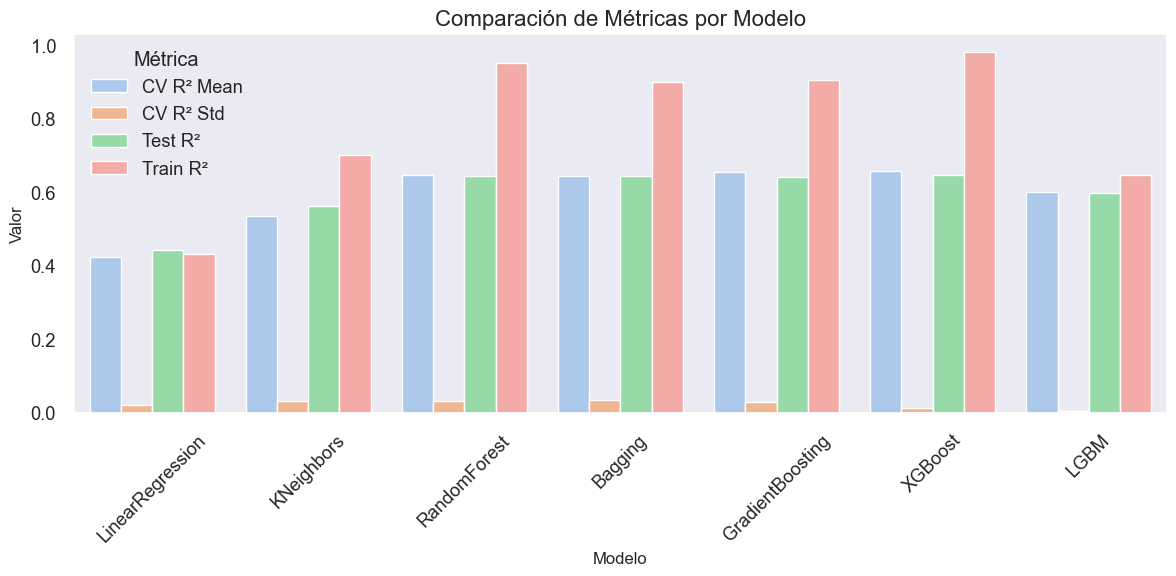

In [ ]:
sns.set_theme(style="dark", palette="pastel", font_scale=1.2)

df_resultados.drop(columns=["Test MSE", "Train MSE"], inplace=True)
df_melted = df_resultados.melt(id_vars="Modelo", var_name="Métrica", value_name="Valor")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Modelo", y="Valor", hue="Métrica")

plt.title("Comparación de Métricas por Modelo", fontsize=16)
plt.xlabel("Modelo", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.legend(title="Métrica")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# 5. Conclusiones
Los modelos de ensamble (RandomForest, Bagging, GradientBoosting, XGBoost) superan claramente a la regresión lineal y a KNN, alcanzando un R² de alrededor de 0.64–0.65 en test. XGBoost se ubica como el más preciso con R² = 0.65, mientras que LightGBM queda algo rezagado en este conjunto de datos.
